# Micro-Credit Defaulter Model

As we can see from the problem statement that the target variable is in discrete form so, we can use logistic regression as well as classification for this model.

In [257]:
#importing the required libraries.

import warnings
warnings.filterwarnings('ignore')

In [258]:
import pandas as pd
import numpy as np

In [259]:
df=pd.read_csv('Data.csv',names=range(0,36),header=0)

In [260]:
df.head()

0            1      2             3             4        5        6     7   \
0   0  21408I70789  272.0   3055.050000   3065.150000   220.13   260.13   2.0   
1   1  76462I70374  712.0  12122.000000  12124.750000  3691.26  3691.26  20.0   
2   1  17943I70372  535.0   1398.000000   1398.000000   900.13   900.13   3.0   
3   1  55773I70781  241.0     21.228000     21.228000   159.42   159.42  41.0   
4   1  03813I82730  947.0    150.619333    150.619333  1098.90  1098.90   4.0   

    8     9   ...    26   27   28  29  30   31         32         33   34  \
0  0.0  1539  ...   6.0  0.0  2.0  12   6  0.0  29.000000  29.000000  UPW   
1  0.0  5787  ...  12.0  0.0  1.0  12  12  0.0   0.000000   0.000000  UPW   
2  0.0  1539  ...   6.0  0.0  1.0   6   6  0.0   0.000000   0.000000  UPW   
3  0.0   947  ...   6.0  0.0  2.0  12   6  0.0   0.000000   0.000000  UPW   
4  0.0  2309  ...   6.0  0.0  7.0  42   6  0.0   2.333333   2.333333  UPW   

          35  
0  7/20/2016  
1  8/10/2016  
2  8/19/2016  
3   6/6/2016  
4  6/22/2016  

[5 rows x 36 columns]

In [261]:
#from the above we can see that the dataset is very large and consists of 36 columns so further we will use data cleansing
#process and remove the unwanted columns as well as we will use PCA i.e principle component analysis to reduce the no of columns

In [262]:
df.drop(35,axis=1,inplace=True)
df.drop(1,axis=1,inplace=True)

In [263]:
df.head(3)

0      2         3         4        5        6     7    8     9   10  ...  \
0   0  272.0   3055.05   3065.15   220.13   260.13   2.0  0.0  1539   2  ...   
1   1  712.0  12122.00  12124.75  3691.26  3691.26  20.0  0.0  5787   1  ...   
2   1  535.0   1398.00   1398.00   900.13   900.13   3.0  0.0  1539   1  ...   

   25    26   27   28  29  30   31    32    33   34  
0  12   6.0  0.0  2.0  12   6  0.0  29.0  29.0  UPW  
1  12  12.0  0.0  1.0  12  12  0.0   0.0   0.0  UPW  
2   6   6.0  0.0  1.0   6   6  0.0   0.0   0.0  UPW  

[3 rows x 34 columns]

In [264]:
df.shape

(209593, 34)

In [265]:
df.dtypes

0       int64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9       int64
10      int64
11    float64
12    float64
13    float64
14    float64
15      int64
16      int64
17      int64
18    float64
19    float64
20    float64
21    float64
22      int64
23      int64
24      int64
25      int64
26    float64
27    float64
28    float64
29      int64
30      int64
31    float64
32    float64
33    float64
34     object
dtype: object

In [266]:
#as we can see from the above that few columns are in object data type so we will convert them to int or float using encoding.

In [267]:
from sklearn.preprocessing import LabelEncoder

In [268]:
df[34].dtype

dtype('O')

In [269]:
le=LabelEncoder()
df[34]=le.fit_transform(df[34].astype(str))

In [270]:
df[34].dtype

dtype('int32')

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 34 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       209593 non-null  int64  
 1   2       209593 non-null  float64
 2   3       209593 non-null  float64
 3   4       209593 non-null  float64
 4   5       209593 non-null  float64
 5   6       209593 non-null  float64
 6   7       209593 non-null  float64
 7   8       209593 non-null  float64
 8   9       209593 non-null  int64  
 9   10      209593 non-null  int64  
 10  11      209593 non-null  float64
 11  12      209593 non-null  float64
 12  13      209593 non-null  float64
 13  14      209593 non-null  float64
 14  15      209593 non-null  int64  
 15  16      209593 non-null  int64  
 16  17      209593 non-null  int64  
 17  18      209593 non-null  float64
 18  19      209593 non-null  float64
 19  20      209593 non-null  float64
 20  21      209593 non-null  float64
 21  22      20

In [272]:
#we can see from the above that the data the doesnot contain any null value 

In [273]:
# now we will seperate x any y from our dataset which is our data and target valus respectively.

In [274]:
x=df.drop(0,axis=1)

In [275]:
x.head()

2             3             4        5        6     7    8     9   10  \
0  272.0   3055.050000   3065.150000   220.13   260.13   2.0  0.0  1539   2   
1  712.0  12122.000000  12124.750000  3691.26  3691.26  20.0  0.0  5787   1   
2  535.0   1398.000000   1398.000000   900.13   900.13   3.0  0.0  1539   1   
3  241.0     21.228000     21.228000   159.42   159.42  41.0  0.0   947   0   
4  947.0    150.619333    150.619333  1098.90  1098.90   4.0  0.0  2309   7   

     11  ...  25    26   27   28  29  30   31         32         33  34  
0  21.0  ...  12   6.0  0.0  2.0  12   6  0.0  29.000000  29.000000   0  
1   0.0  ...  12  12.0  0.0  1.0  12  12  0.0   0.000000   0.000000   0  
2   0.0  ...   6   6.0  0.0  1.0   6   6  0.0   0.000000   0.000000   0  
3   0.0  ...  12   6.0  0.0  2.0  12   6  0.0   0.000000   0.000000   0  
4   2.0  ...  42   6.0  0.0  7.0  42   6  0.0   2.333333   2.333333   0  

[5 rows x 33 columns]

In [276]:
y=df[0].values
y=y.reshape(-1,1)

In [277]:
y.shape

(209593, 1)

In [278]:
x.shape

(209593, 33)

In [279]:
x.describe()

2              3              4              5   \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean     8112.343445    5381.402289    6082.515068    2692.581910   
std     75696.082531    9220.623400   10918.812767    4308.586781   
min       -48.000000     -93.012667     -93.012667  -23737.140000   
25%       246.000000      42.440000      42.692000     280.420000   
50%       527.000000    1469.175667    1500.000000    1083.570000   
75%       982.000000    7244.000000    7802.790000    3356.940000   
max    999860.755200  265926.000000  320630.000000  198926.110000   

                  6             7              8              9   \
count  209593.000000  209593.00000  209593.000000  209593.000000   
mean     3483.406534    3755.84780    3712.202921    2064.452797   
std      5770.461279   53905.89223   53374.833430    2370.786034   
min    -24720.580000     -29.00000     -29.000000       0.000000   
25%       300.260000       1.00000       0.000000     770.000000   
50%      1334.000000       3.00000       0.000000    1539.000000   
75%      4201.790000       7.00000       0.000000    2309.000000   
max    200148.110000  998650.37770  999171.809400   55000.000000   

                  10             11  ...             25             26  \
count  209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        3.978057    3737.355121  ...      17.952021     274.658747   
std         4.256090   53643.625172  ...      17.379741    4245.264648   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       6.000000       6.000000   
50%         3.000000       2.000000  ...      12.000000       6.000000   
75%         5.000000       6.000000  ...      24.000000       6.000000   
max       203.000000  999606.368100  ...     306.000000   99864.560860   

                  27             28             29             30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.054029      18.520919      23.645398       6.703134   
std         0.218039     224.797423      26.469861       2.103864   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       6.000000       6.000000   
50%         0.000000       2.000000      12.000000       6.000000   
75%         0.000000       5.000000      30.000000       6.000000   
max         3.000000    4997.517944     438.000000      12.000000   

                  31             32             33        34  
count  209593.000000  209593.000000  209593.000000  209593.0  
mean        0.046077       3.398826       4.321485       0.0  
std         0.200692       8.813729      10.308108       0.0  
min         0.000000       0.000000       0.000000       0.0  
25%         0.000000       0.000000       0.000000       0.0  
50%         0.000000       0.000000       1.666667       0.0  
75%         0.000000       3.750000       4.500000       0.0  
max         3.000000     171.500000     171.500000       0.0  

[8 rows x 33 columns]

From the above we can see that the outliers is present in the data set as the maximum value is deviating from the 3rd quartile value , so our next step will be to remove the outliers present in the dataset.

In [280]:
#data visualisation

In [281]:
from matplotlib import pyplot as plt
import seaborn as sns

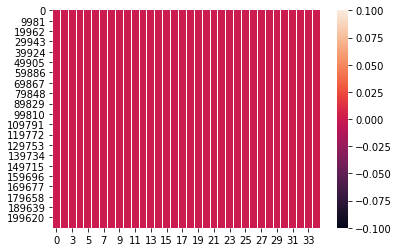

In [282]:
sns.heatmap(df.isnull())

In [283]:
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(),annot=True)

In [284]:
#we can see from the above that most of the values are negatively correlated with each other.

<Figure size 1440x720 with 0 Axes>

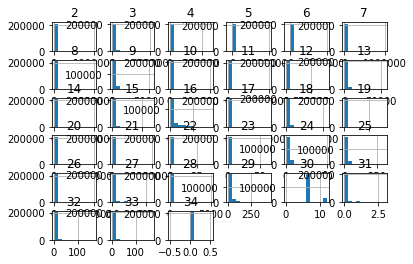

<Figure size 1440x720 with 0 Axes>

In [285]:
%matplotlib inline
x.hist()
plt.figure(figsize=(20,10))

In [286]:
sns.countplot(df[0])
#0 indicates that the loan has not been paid i.e defaulter
#1 indicates the non defaulter

In [287]:
x.boxplot(figsize=(10,5),color='green')
#the below displayed graph shows the outliers present on the data set.

Now we will remove the outliers from the dataset

In [288]:
from scipy.stats import zscore

In [289]:
z=(np.abs(zscore(x)))

In [290]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([14, 14, 31, ..., 27, 25, 29], dtype=int64))


In [291]:
z[21,14]

4.4703916213001245

In [292]:
x_new=x[(z<3).all(axis=1)]

In [293]:
x.head()

2             3             4        5        6     7    8     9   10  \
0  272.0   3055.050000   3065.150000   220.13   260.13   2.0  0.0  1539   2   
1  712.0  12122.000000  12124.750000  3691.26  3691.26  20.0  0.0  5787   1   
2  535.0   1398.000000   1398.000000   900.13   900.13   3.0  0.0  1539   1   
3  241.0     21.228000     21.228000   159.42   159.42  41.0  0.0   947   0   
4  947.0    150.619333    150.619333  1098.90  1098.90   4.0  0.0  2309   7   

     11  ...  25    26   27   28  29  30   31         32         33  34  
0  21.0  ...  12   6.0  0.0  2.0  12   6  0.0  29.000000  29.000000   0  
1   0.0  ...  12  12.0  0.0  1.0  12  12  0.0   0.000000   0.000000   0  
2   0.0  ...   6   6.0  0.0  1.0   6   6  0.0   0.000000   0.000000   0  
3   0.0  ...  12   6.0  0.0  2.0  12   6  0.0   0.000000   0.000000   0  
4   2.0  ...  42   6.0  0.0  7.0  42   6  0.0   2.333333   2.333333   0  

[5 rows x 33 columns]

As we can see that the dataset contains many columns so we will reduce the number of columns from our dataset using Principle Component Analysis.

In [294]:
from sklearn.decomposition import PCA

In [295]:
pca=PCA(n_components=9)

In [296]:
x=pca.fit_transform(x)

In [297]:
x.shape

(209593, 9)

In [298]:
ds=pd.DataFrame(data=x)

In [299]:
ds.head()

0            1            2            3            4  \
0 -7864.408459 -5149.647657 -3368.009380 -1919.055323 -4670.829621   
1 -7419.927116 -5101.786611 -3366.883742 -1912.690921 -4699.516423   
2 -7602.004081 -5107.173055 -3337.992864 -1924.693206 -4703.727770   
3 -7897.137124 -5137.000999 -3383.652675 -1883.655630 -4676.000532   
4 -7182.782257 -5124.757825 -3386.797589 -1908.907118 -4689.139339   

             5             6             7            8  
0 -2599.719038 -11225.655064  -1301.547648 -3321.170251  
1 -2607.131917     11.313637  -9287.777598 -3145.609572  
2 -2600.484278 -14103.092442  -1232.296565 -1829.872577  
3 -2597.631459 -16453.922991   -514.719291 -2276.809463  
4 -2600.159636   8107.957479  16417.699877  2442.838165

As we can see from the above that the data is not distributed normally so we will use Standard Scalar which is a type of normalization to bring mean to 0 and about 68% of the values will lie be between -1 and 1.

In [300]:
from sklearn.preprocessing import StandardScaler

In [301]:
std=StandardScaler()

In [302]:
x=std.fit_transform(x)

In [303]:
x=pd.DataFrame(x)

In [304]:
x.shape

(209593, 9)

In [305]:
x.head()

0         1         2         3         4         5         6  \
0 -0.103894 -0.095190 -0.062426 -0.035667 -0.087145 -0.048720 -0.492572   
1 -0.098022 -0.094305 -0.062405 -0.035549 -0.087681 -0.048859  0.000496   
2 -0.100427 -0.094405 -0.061870 -0.035772 -0.087759 -0.048734 -0.618831   
3 -0.104326 -0.094956 -0.062716 -0.035009 -0.087242 -0.048681 -0.721983   
4 -0.094889 -0.094730 -0.062774 -0.035479 -0.087487 -0.048728  0.355770   

          7         8  
0 -0.151716 -0.552326  
1 -1.082640 -0.523129  
2 -0.143644 -0.304316  
3 -0.059999 -0.378644  
4  1.913747  0.406255

From the above we can see that the data set is totally imbalanced so we will apply under sampling technique to balance this data set.

In [306]:
defaulter=df[df[0]==0]
nondefaulter=df[df[0]==1]

In [307]:
print(defaulter.shape,nondefaulter.shape)

(26162, 34) (183431, 34)


In [308]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [309]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x,y = rus.fit_resample(x, y)

In [310]:
x.shape

(52324, 9)

In [311]:
y.shape

(52324, 1)

In [312]:
x=pd.DataFrame(x)

In [313]:
y=pd.DataFrame(y)

In [314]:
x.head()

0         1         2         3         4         5         6  \
0 -0.103894 -0.095190 -0.062426 -0.035667 -0.087145 -0.048720 -0.492572   
1 -0.106326 -0.087977 -0.058295 -0.037481 -0.089722 -0.049534 -0.281164   
2 -0.093820 -0.095464 -0.062404 -0.035528 -0.087433 -0.048561 -0.746586   
3 -0.086604 -0.095516 -0.062446 -0.035544 -0.087415 -0.048546 -0.714230   
4 -0.102471 -0.087473 -0.057471 -0.037939 -0.090070 -0.049566 -0.673026   

          7         8  
0 -0.151716 -0.552326  
1  0.844017 -0.057840  
2 -0.178461 -0.168749  
3 -0.283958 -0.293650  
4 -0.042778 -0.424237

In [315]:
y.head()

0
0  0
1  0
2  0
3  0
4  0

In [316]:
#Now we will be performing analysis with various models

In [317]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [318]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(pred,y_test)
    print("accuracy score corrosponding to random state:",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print()
print()
print("the max accuracy score for final random state",final_r_state,"is:",max_acc_score)

accuracy score corrosponding to random state: 42 is: 0.7271858576206403
accuracy score corrosponding to random state: 43 is: 0.7241280458671763
accuracy score corrosponding to random state: 44 is: 0.7299569995222169
accuracy score corrosponding to random state: 45 is: 0.7247969421882465
accuracy score corrosponding to random state: 46 is: 0.7256569517439083
accuracy score corrosponding to random state: 47 is: 0.728810320114668
accuracy score corrosponding to random state: 48 is: 0.737505972288581
accuracy score corrosponding to random state: 49 is: 0.7269947443860487
accuracy score corrosponding to random state: 50 is: 0.7255613951266126
accuracy score corrosponding to random state: 51 is: 0.7302436693741041
accuracy score corrosponding to random state: 52 is: 0.7260391782130913
accuracy score corrosponding to random state: 53 is: 0.7279503105590062
accuracy score corrosponding to random state: 54 is: 0.7370281892021022
accuracy score corrosponding to random state: 55 is: 0.73655040611

In [319]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75      5156
           1       0.80      0.60      0.69      5309

    accuracy                           0.72     10465
   macro avg       0.74      0.72      0.72     10465
weighted avg       0.74      0.72      0.72     10465



In [320]:
print(confusion_matrix(y_test,pred))
#from the below we can infer that still type 1 and type 2 errors is present

[[4353  803]
 [2123 3186]]


In [321]:
print('Precision Score is:',precision_score(y_test,pred))

Precision Score is: 0.7986964151416395


In [322]:
print('Recall Score is:',recall_score(y_test,pred))

Recall Score is: 0.6001130156338293


In [323]:
print('F1 score is:',f1_score(y_test,pred))

F1 score is: 0.6853086685308668


We can see from the above the results of different metrices in classification.....

In [324]:
#now we will use hyper parameter tuning to check the best parameter for the other models:-

In [325]:
from sklearn.model_selection import GridSearchCV

In [326]:
dtc=DecisionTreeClassifier()

In [327]:
param={'criterion':('gini','entropy')}

In [328]:
gd=GridSearchCV(estimator=dtc,param_grid=param)

In [329]:
gd.fit(x,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy')})

In [330]:
gd.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [331]:
gd.best_params_

{'criterion': 'entropy'}

In [332]:
gd.best_score_

0.7142420818777021

Conclusion:-Decision Tree classifier is giving a max of 71 % accuracy score with criterion as entropy

In [333]:
#working with knn classifier
for i in range(1,14):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred2=knn.predict(x_test)
    print("accuracy score for neighbors",i,"is:",accuracy_score(pred2,y_test))
    
score=cross_val_score(knn,x,y,cv=5).mean()
print("cross val score is:",score)

accuracy score for neighbors 1 is: 0.7139034878165313
accuracy score for neighbors 2 is: 0.6890587673196369
accuracy score for neighbors 3 is: 0.7354992833253703
accuracy score for neighbors 4 is: 0.7287147634973722
accuracy score for neighbors 5 is: 0.7433349259436216
accuracy score for neighbors 6 is: 0.7376015289058767
accuracy score for neighbors 7 is: 0.7480172001911133
accuracy score for neighbors 8 is: 0.7447682752030578
accuracy score for neighbors 9 is: 0.7527950310559006
accuracy score for neighbors 10 is: 0.746201624462494
accuracy score for neighbors 11 is: 0.7511705685618729
accuracy score for neighbors 12 is: 0.7460105112279025
accuracy score for neighbors 13 is: 0.7497372193024366
cross val score is: 0.7541280860477111


Conclusion:-From the above we can infer that KNeighbors Classifier is giving max of 75% accuracy score with n_neighbor=13

In [334]:
from sklearn.ensemble import AdaBoostClassifier

In [335]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("accuracy score with 100 estimators is:",accuracy_score(y_test,predad))

accuracy score with 100 estimators is: 0.7531772575250836


Conclusion:-Adaboost Classifier is giving a max of 75 % accuracy score

In [336]:
results={'Models':('Logistic Regressor','Decision Tree','Knn','Adaboost Classifier'),'Accuracy Score in %':[74,71,75,75.3]}

In [337]:
data_f=pd.DataFrame(data=results)

In [338]:
data_f

Models  Accuracy Score in %
0   Logistic Regressor                 74.0
1        Decision Tree                 71.0
2                  Knn                 75.0
3  Adaboost Classifier                 75.3

Conclusion:-So From the above implementation we can conclude that Knn proves to be the best model for the given dataset.
    Cons:-slow model

In [339]:
#finalizing our model

In [341]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [342]:
predknn=knn.predict(x_test)
d_f=pd.DataFrame(data=predknn)
d_f.to_csv('Predicted Result')    #saving result in csv form

In [343]:
print(accuracy_score(y_test,predknn))

0.7497372193024366


In [344]:
print(precision_score(y_test,predknn))

0.7567773959526537


In [345]:
print(recall_score(y_test,predknn))

0.7466566208325485


In [346]:
print(confusion_matrix(y_test,predknn))

[[3882 1274]
 [1345 3964]]


In [347]:
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      5156
           1       0.76      0.75      0.75      5309

    accuracy                           0.75     10465
   macro avg       0.75      0.75      0.75     10465
weighted avg       0.75      0.75      0.75     10465



In [348]:
#now we will plot auc-roc curve for logistic regressor model

In [349]:
from sklearn.metrics import roc_auc_score,roc_curve

In [350]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [351]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

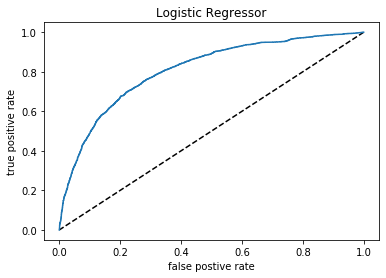

In [352]:
plt.plot([1,0],[1,0],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false postive rate')
plt.ylabel("true positive rate")
plt.title("Logistic Regressor")
plt.show()

In [353]:
#dumping the final model using serialisation

In [354]:
import joblib
joblib.dump(knn,'knn_model.obj')

['knn_model.obj']